# Word2Vec Tutorial with Gensim

In [1]:
!pip install gensim


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# imports

import json
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import utils

%matplotlib inline

2023-03-01 20:06:27.341302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load and display data

with open('../data/countries.json', 'r') as fout:
    countries = json.load(fout)

In [4]:
countries['India'][:20]

['India',
 'Hindi',
 'Bhārat',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 'Hindi',
 'Bhārat',
 'Gaṇarājya',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 'It',
 'is',
 'the']

In [5]:
print(' '.join(countries['India'])[:512] + ' ...')

India Hindi Bhārat officially the Republic of India Hindi Bhārat Gaṇarājya is a country in South Asia It is the second most populous country the seventh largest country by land area and the most populous democracy in the world Bounded by the Indian Ocean on the south the Arabian Sea on the southwest and the Bay of Bengal on the southeast it shares land borders with Pakistan to the west China Nepal and Bhutan to the north and Bangladesh and Myanmar to the east In the Indian Ocean India is in the vicinity of  ...


In [6]:
for i, (country, text) in enumerate(countries.items()):
    print(country)
    print(' '.join(text)[:512] + ' ...')
    print('-' * 100)
    if i >= 5:
        break

Afghanistan
Afghanistan listen Pashto Dari افغانستان Pashto Afġānistān avɣɒnisˈtɒn ab Dari Afġānestān avɣɒnesˈtɒn officially the Islamic Republic of Afghanistan is a mountainous landlocked country at the crossroads of Central and South Asia Afghanistan is bordered by Pakistan to the east and south Iran to the west Turkmenistan Uzbekistan and Tajikistan to the north and China to the northeast Occupying 652 000 square kilometers 252 000 sq mi it is a mountainous country with plains in the north and southwest Kabul is the ...
----------------------------------------------------------------------------------------------------
Albania
Albania listen a w l BAY nee ə Albanian Shqipëri or Shqipëria officially the Republic of Albania Albanian Republika e Shqipërisë is a country in Southeastern Europe It is located on the Adriatic and Ionian Sea within the Mediterranean Sea and shares land borders with Montenegro to the northwest Kosovo to the northeast North Macedonia to the east Greece to the 

## Basic Word2Vec Usage

In [7]:
# Create and train a simple model

model = Word2Vec(sentences=countries.values())

In [8]:
# Check word similarities learnt by the model

model.wv.most_similar('India', topn=5)

[('Brazil', 0.8356989026069641),
 ('China', 0.8140164017677307),
 ('Iran', 0.8075459003448486),
 ('Mozambique', 0.7967085242271423),
 ('Turkey', 0.7697516679763794)]

In [9]:
# Enable computation of loss

model = Word2Vec(
    sentences=countries.values(),
    compute_loss=True
)
model.get_latest_training_loss()

5181355.0

### Word2Vec options

In [10]:
Word2Vec?

## Heuristics for Word2vec algorithms

### Determining size of the vocabulary

In [11]:
# How many unique words in the vocabulary?

counter = Counter()
for words in countries.values():
    for word in words:
        counter.update([word])

print(len(counter))

85125


In [12]:
# Default vocabulary size of the original model

len(model.wv)

21092

Loss after epoch 0: 1353837.25
Loss after epoch 1: 1076362.0
Loss after epoch 2: 955162.25
Loss after epoch 3: 887807.5
Loss after epoch 4: 768290.0
Loss after epoch 5: 743163.0
Loss after epoch 6: 725818.0
Loss after epoch 7: 707261.5
Loss after epoch 8: 699617.0
Loss after epoch 9: 654771.5


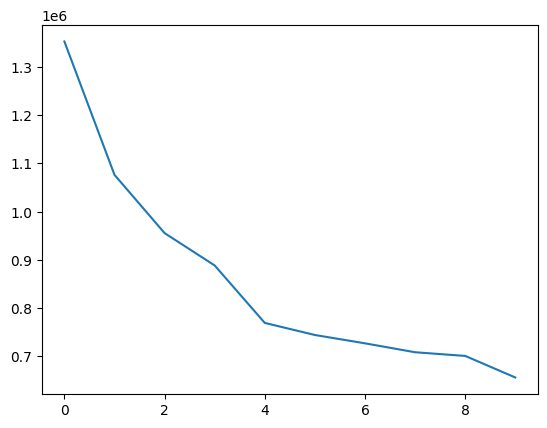

In [13]:
# Retrain - increased vocabulary size, more epochs, larger word vectors

metric = utils.MetricCallback(every=1)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=10,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric]
)
plt.plot(metric.myloss)

In [14]:
# Check similarities again

model.wv.most_similar('India')

[('China', 0.713501513004303),
 ('Vietnam', 0.6344156861305237),
 ('Pakistan', 0.6138748526573181),
 ('Asia', 0.5837562680244446),
 ('Nigeria', 0.5825437307357788),
 ('Indonesia', 0.5770354866981506),
 ('Iran', 0.5734570026397705),
 ('Nepal', 0.5658297538757324),
 ('Thailand', 0.5652980804443359),
 ('Japan', 0.5649046301841736)]

Loss after epoch 0: 478237.25
Loss after epoch 10: 246103.5
Loss after epoch 20: 227705.0
Loss after epoch 30: 204666.5
Loss after epoch 40: 197106.0
Loss after epoch 50: 182215.0
Loss after epoch 60: 182447.0
Loss after epoch 70: 172268.0
Loss after epoch 80: 165431.0
Loss after epoch 90: 124074.0


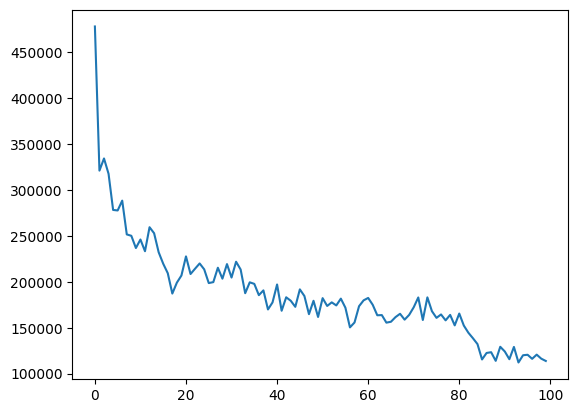

In [15]:
# Retrain - more epochs

metric = utils.MetricCallback(every=10)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=100,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric],
    min_alpha=0.001,
    workers=9
)
plt.plot(metric.myloss)

In [16]:
model.wv.most_similar('India')

[('Nepal', 0.5848039388656616),
 ('China', 0.5640860199928284),
 ('Singapore', 0.5541695356369019),
 ('Pakistan', 0.5491935610771179),
 ('Bangladesh', 0.5287947654724121),
 ('Vietnam', 0.5006957650184631),
 ('Indonesia', 0.467528373003006),
 ('Bengal', 0.46661245822906494),
 ('Indian', 0.4642815589904785),
 ('Malaysia', 0.46117356419563293)]

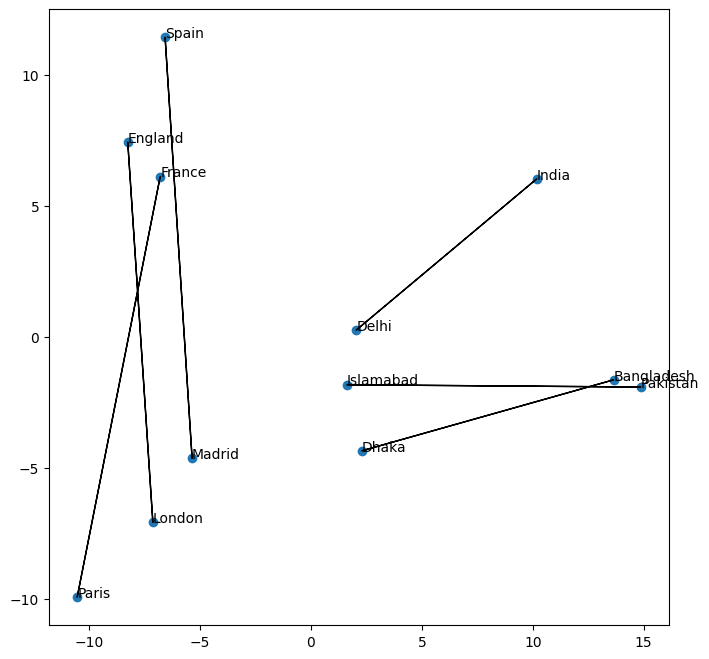

In [17]:
# Examine the vector space

X = ['India', 'Pakistan', 'Bangladesh', 'France', 'England', 'Spain']
Y = ['Delhi', 'Islamabad', 'Dhaka', 'Paris', 'London', 'Madrid']
utils.plot_arrows(X, Y, model.wv)

/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


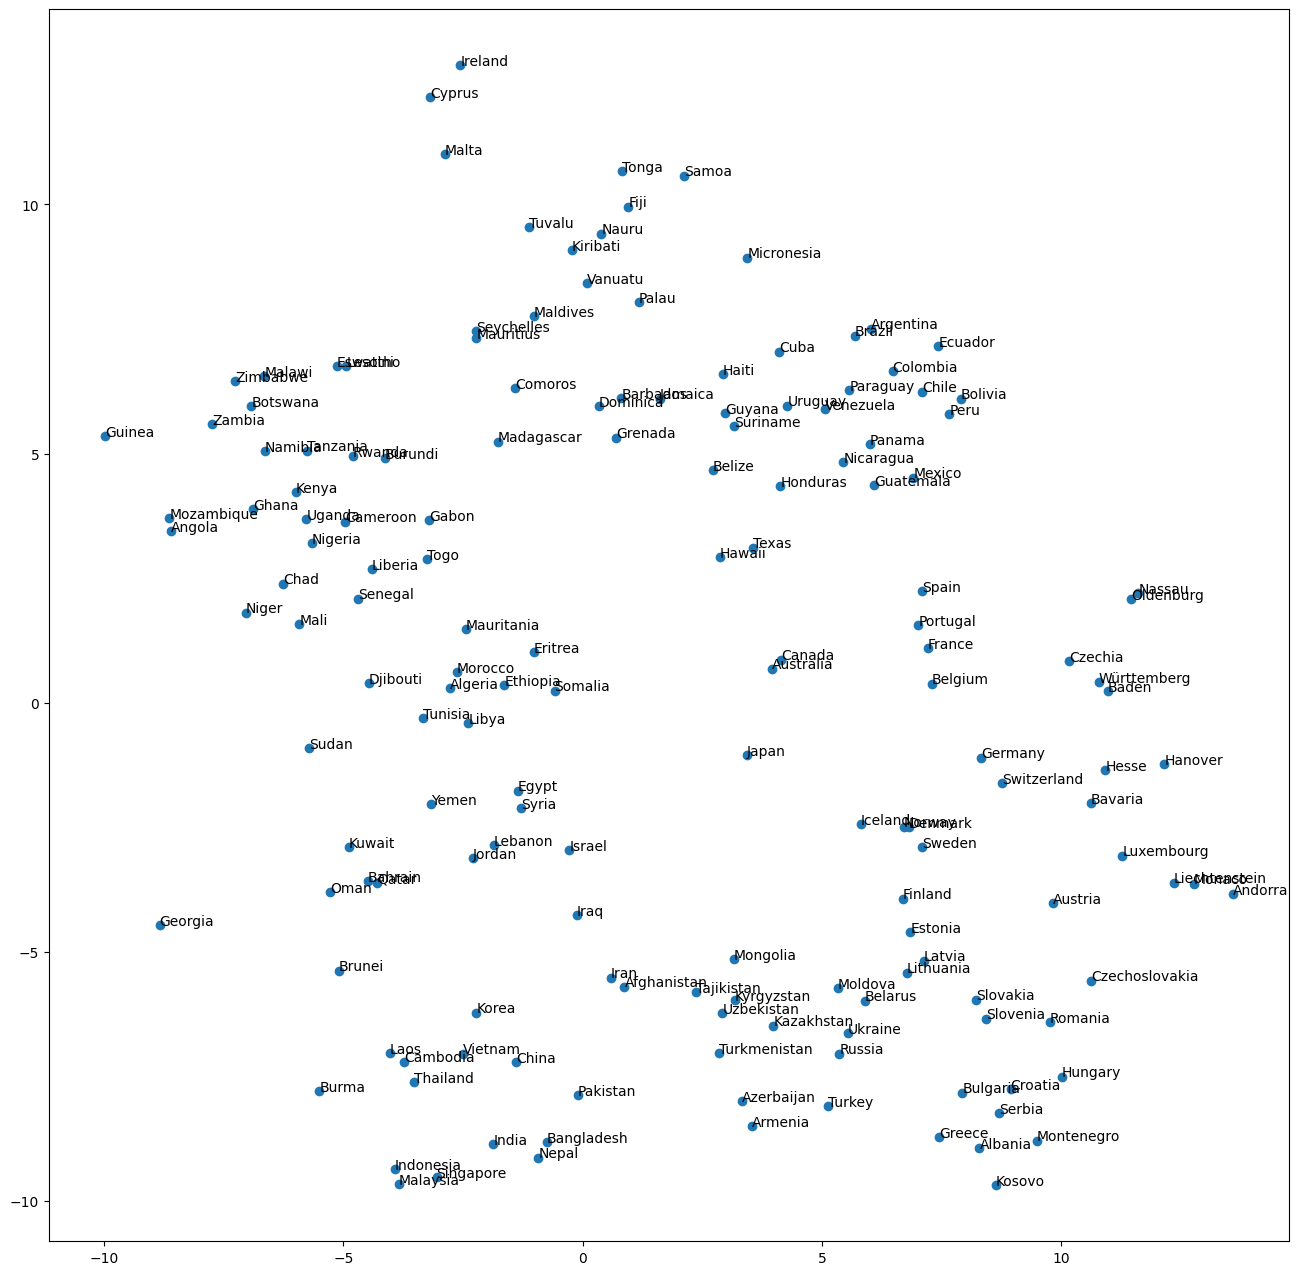

In [18]:
# Visualize vectors for all countries

utils.plot_vectors(countries, model)

## Word Analogies

In [19]:
# India: Ganges -> Brazil: __ ?

model.wv.most_similar(positive=['Ganges', 'Brazil'], negative=['India'])

[('river', 0.4572344124317169),
 ('Lempa', 0.4561925530433655),
 ('Paraná', 0.4497566819190979),
 ('Amazon', 0.4308626651763916),
 ('Plata', 0.4161778390407562),
 ('Putumayo', 0.41588541865348816),
 ('Napo', 0.41517871618270874),
 ('rivers', 0.4146406948566437),
 ('Río', 0.40634700655937195),
 ('Esmeraldas', 0.39137518405914307)]

In [20]:
# America: Washington -> France: __ ?

model.wv.most_similar(positive=['Washington', 'France'], negative=['America'])

[('Paris', 0.42737066745758057),
 ('London', 0.3995920717716217),
 ('Arnold', 0.3924475908279419),
 ('Garibaldi', 0.3922250270843506),
 ('UK', 0.388365238904953),
 ('French', 0.3803882896900177),
 ('Duke', 0.3796524703502655),
 ('Taylor', 0.3641713559627533),
 ('1803', 0.35947147011756897),
 ('Mussolini', 0.35717183351516724)]

In [21]:
# India: Hindi -> Germany: __ ?

model.wv.most_similar(positive=['Hindi', 'Germany'], negative=['India'])

[('German', 0.463407427072525),
 ('Edvard', 0.4313614070415497),
 ('Version', 0.4057869017124176),
 ('Austrians', 0.4057660698890686),
 ('Kurt', 0.4006946086883545),
 ('Georg', 0.3982882797718048),
 ('Sándor', 0.3903513550758362),
 ('Gerhard', 0.3866270184516907),
 ('Leibniz', 0.3808653652667999),
 ('Österreich', 0.3782944679260254)]

In [22]:
# Save the model

model.save('wiki-countries.w2v')

In [23]:
from gensim.models import KeyedVectors
model = KeyedVectors.load('wiki-countries.w2v')

In [24]:
model